In [71]:
import matplotlib.pyplot as plt
import numpy as np

w0 = np.random.uniform(low = -0.25, high = 0.25)
w1 = np.random.uniform(low = -1, high = 1)
w2 = np.random.uniform(low = -1, high = 1)

weightList = list([w0,w1,w2])
weightArray = np.array(weightList)
print("Weights chosen are: ", weightList)

Weights chosen are:  [0.11332138703177536, -0.4815968076578201, 0.8272957274777544]


In [72]:
n = 100
S = np.array([])
S_0 = []
S_1 = []

def CreateSArray(n):
    global S, S_0, S_1
    S = np.random.uniform(low = -1, high = 1, size=(n,2))
    for i in S:
        if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
            S_1.append([i[0]] + [i[1]])
        else:
            S_0.append([i[0]] + [i[1]])
    #print(S_0, S_1)

In [73]:
"""
Plotting Graph
"""
def PlotBoundaryGraph():
    S_0X = []
    S_0Y = []
    S_1X = []
    S_1Y = []
    for i in S_0:
        #plt.scatter(x=i[0], y=i[1], c='b', marker='o', label='S0')
        S_0X += [i[0]]
        S_0Y += [i[1]]
    for i in S_1:
        #plt.scatter(x=i[0], y=i[1], c='g', marker='x', label="S1")
        S_1X += [i[0]]
        S_1Y += [i[1]]
    
    
    plt.scatter(x=S_0X, y=S_0Y, c='b', marker='o', label='S0')
    plt.scatter(x=S_1X, y=S_1Y, c='r', marker='x', label='S1')
    plt.plot([(w2-w0)/w1 , -(w2+w0)/w1],[-1,1], linewidth=1, label='Boundary')
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.show()

In [74]:
"""
Initialise the W'
"""
w0_dash = np.random.uniform(low = -1, high = 1)
w1_dash = np.random.uniform(low = -1, high = 1)
w2_dash = np.random.uniform(low = -1, high = 1)
print ("Weights W'i are: ", [w0_dash, w1_dash, w2_dash])

initial_weights = [w0_dash, w1_dash, w2_dash]

"""
Step Function
"""
def step_fn(x):
    if x >=0: return 1
    else: return 0
    

Weights W'i are:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]


In [75]:
"""
Perform the weight Multiplication and use activation function to compute Y
"""
def mutiplyWeights(weight, Xi):
    return step_fn(weight[0]*1 + weight[1]*Xi[0] + weight[2]*Xi[1])


In [76]:
"""
Compute Misclassifications
"""
def misclassifications(S_0, S_1, omega_weights):
    misses = 0
    for i in range(len(S_0)):
        y = mutiplyWeights(omega_weights, S_0[i][:])
        if y!=0:
            misses+=1
    for i in range(len(S_1)):
        y = mutiplyWeights(omega_weights, S_1[i][:])
        if y!=1:
            misses+=1
    return misses


In [77]:
"""
PTA Algorithm
"""

def PTA(omega_value, desired_weights, learning_rate):
    omega_shallow_copy = omega_value[:]
    epochNumber = 0 
    omegaList = []
    misses = []
    while misclassifications(S_0, S_1, omega_shallow_copy):
        misses.append(misclassifications(S_0, S_1, omega_shallow_copy))
        epochNumber +=1
        for j in range(S.shape[0]):
            calculated_y = mutiplyWeights(omega_shallow_copy, S[j])
            desired_y = mutiplyWeights(desired_weights, S[j])
            #print(calculated_y, desired_y)
            if calculated_y == 1 and desired_y == 0:
                omega_shallow_copy[0] = omega_shallow_copy[0] - learning_rate*1
                omega_shallow_copy[1] = omega_shallow_copy[1] - learning_rate*S[j][0]
                omega_shallow_copy[2] = omega_shallow_copy[2] - learning_rate*S[j][1]
            elif calculated_y == 0 and desired_y == 1 :
                omega_shallow_copy[0] = omega_shallow_copy[0] + learning_rate*1
                omega_shallow_copy[1] = omega_shallow_copy[1] + learning_rate*S[j][0]
                omega_shallow_copy[2] = omega_shallow_copy[2] + learning_rate*S[j][1]
        #print(epochNumber, misclassifications(S_0, S_1, omega_value), omega_value)
        omegaList.append(omega_shallow_copy)
    final_missclassification = misclassifications(S_0, S_1, omega_shallow_copy)
    #print(epochNumber, final_missclassification)
    #print(type(misses), type(omegaList))
    misses.append(final_missclassification)
    #print(misses)
    return misses, omegaList     

"""
Plot Misclassifications vs Epoch
"""
def plot_epoch_vs_misclassifications(misclassificationArrays, learning_rate, Axis, N):
    
    epochs = len(misclassificationArrays)
    Axis.plot(range(epochs), misclassificationArrays)
    Axis.set_title("For Learning Rate: " + str(learning_rate) + " Sample Size = "+ str(N))
    Axis.set(xlabel='Epochs', ylabel='Misclassifications')
    Axis.plot()

In [78]:
"""
1) Initialise the Sample Vector
2) Plot Boundary Graph
3) Call PTA 
4) Print Omega Initial, Omega Final
5) Plot Misclassifications Vs Epoch Graph for learning_rate 1, 10, 0.1
"""
def do_operactions(N):
    CreateSArray(N)
    PlotBoundaryGraph()
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10)) 
    #print(S_0)
    
    misclassificationArrays, omegaArray = PTA(initial_weights, weightList,learning_rate=1)
    #print(omegaArray)
    print("\nInitialWeights: ",initial_weights)
    print("Initial Misclassification: ", misclassificationArrays[0])
    print("Final Weights {1}\nEpoch: {0}\nLearning Rate: 1 \n".format(len(misclassificationArrays), omegaArray[-1]))
    plot_epoch_vs_misclassifications(misclassificationArrays,  1, ax1, N)
    #print(misclassificationArrays)
    
    
    misclassificationArrays, omegaArray = PTA(initial_weights, weightList,learning_rate=10)
    print("\nInitialWeights: ",initial_weights)
    print("Initial Misclassification: ", misclassificationArrays[0])
    print("Final Weights {1}\nEpoch: {0}\nLearning Rate: 10 \n".format(len(misclassificationArrays), omegaArray[-1]))
    plot_epoch_vs_misclassifications(misclassificationArrays, 10, ax2, N)
     
    
    misclassificationArrays, omegaArray = PTA(initial_weights, weightList,learning_rate=0.1)
    print("\nInitialWeights: ",initial_weights)
    print("Initial Misclassification: ", misclassificationArrays[0])
    print("Final Weights {1}\nEpoch: {0}\nLearning Rate: 0.1\n".format(len(misclassificationArrays), omegaArray[-1]))
    plot_epoch_vs_misclassifications(misclassificationArrays, 0.1, ax3, N)
    
    fig.tight_layout()

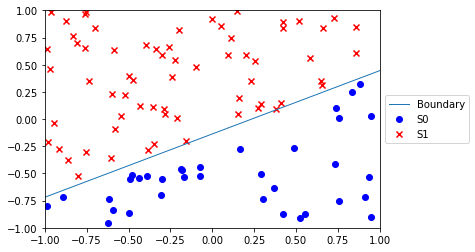


InitialWeights:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]
Initial Misclassification:  33
Final Weights [0.9831107973426545, -3.181323317126619, 5.54022867305463]
Epoch: 10
Learning Rate: 1 


InitialWeights:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]
Initial Misclassification:  33
Final Weights [10.983110797342654, -35.5711623847227, 63.513995320428414]
Epoch: 11
Learning Rate: 10 


InitialWeights:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]
Initial Misclassification:  33
Final Weights [0.08311079734265464, -0.3681449889662912, 0.6463335366135554]
Epoch: 3
Learning Rate: 0.1



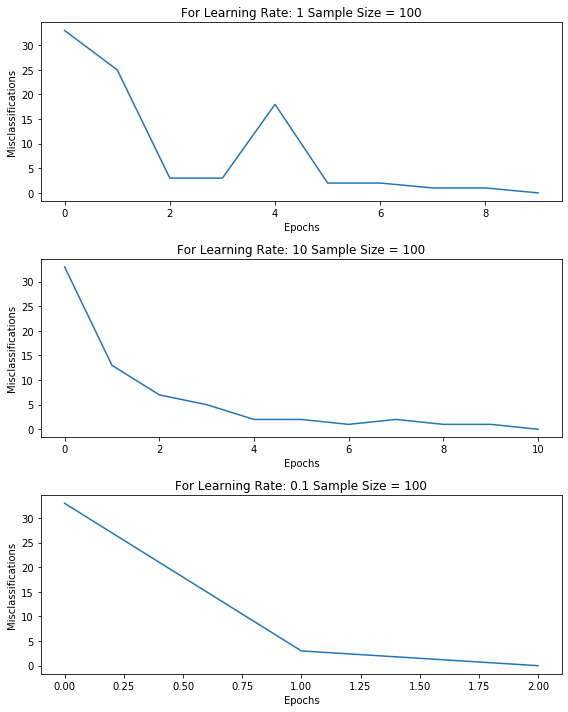

In [79]:
"""
For Sample Size 100
"""
do_operactions(100)

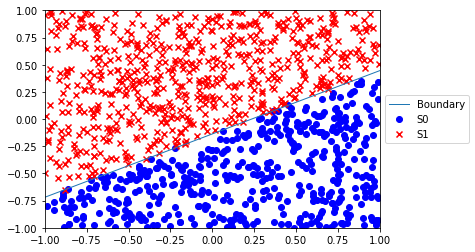


InitialWeights:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]
Initial Misclassification:  454
Final Weights [2.9831107973426545, -12.652974662582965, 21.787964301540026]
Epoch: 70
Learning Rate: 1 


InitialWeights:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]
Initial Misclassification:  454
Final Weights [30.983110797342654, -131.38313403693374, 226.35702307700578]
Epoch: 73
Learning Rate: 10 


InitialWeights:  [0.9831107973426545, 0.7204048506922451, 0.48569708640625775]
Initial Misclassification:  454
Final Weights [0.4831107973426546, -2.0489545168691867, 3.516466559901521]
Epoch: 295
Learning Rate: 0.1



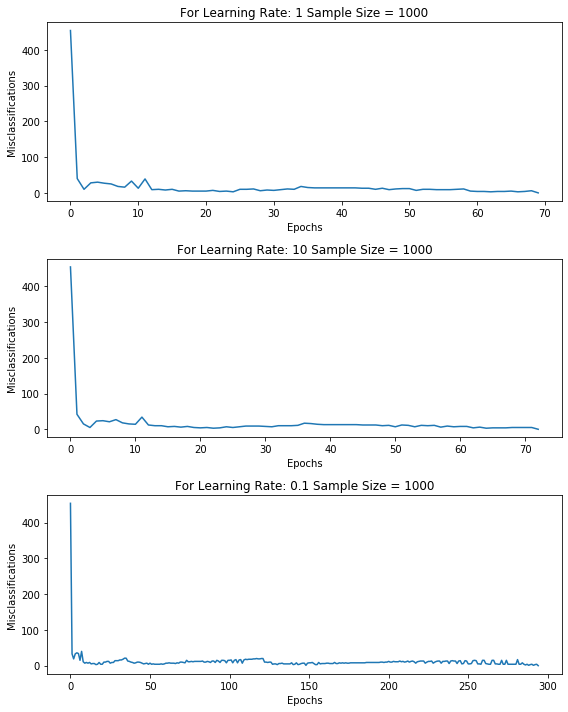

In [80]:
"""
For Sample Size 1000
"""
do_operactions(1000)
